In [2]:
#https://sebastianraschka.com/teaching/pytorch-1h/ por onde eu estudei
import torch
print(torch.cuda.is_available())

#Criando um tensor de:

# 0 dimensoes
tensor0d = torch.tensor(1)
print(tensor0d)
# 1 dimensoes
tensor1d = torch.tensor([1, 2, 3])
print(tensor1d)
# 2 dimensoes
tensor2d = torch.tensor([[1, 2], [3, 4]])
print(tensor2d)
# 3 dimensoes
tensor3d = torch.tensor([[[1, 2], [3, 4]], [[5, 6], [7, 8]]])

#Tipo de dado
print(tensor1d.dtype)

#Shape, atributos do tensor
print(tensor2d.shape)

tensor2d = torch.tensor([[1, 2, 3],
                         [4, 5, 6]])

#podemo mudar isso com o reshape
tensor2d.reshape(3, 2)
print(tensor2d.shape)

#porém é mais comum o:
print(tensor2d.view(3, 2))


#Podemos transpor um vetor com o .T
print(tensor2d.T)

#Multiplicação

print(tensor2d.matmul(tensor2d.T))

#da mesma forma

print(tensor2d @ tensor2d.T)


True
tensor(1)
tensor([1, 2, 3])
tensor([[1, 2],
        [3, 4]])
torch.int64
torch.Size([2, 2])
torch.Size([2, 3])
tensor([[1, 2],
        [3, 4],
        [5, 6]])
tensor([[1, 4],
        [2, 5],
        [3, 6]])
tensor([[14, 32],
        [32, 77]])
tensor([[14, 32],
        [32, 77]])


In [3]:
#Grafos

import torch.nn.functional as F

#Uma simples rede neural de regressão logistica

y = torch.tensor([1.0])  # true label, ultima camada
x1 = torch.tensor([1.1]) # input feature, seria as entradas
w1 = torch.tensor([2.2]) # weight parameter, os pesos (ou coeficientes)
b = torch.tensor([0.0])  # bias unit, o bais (coeficiente que que não multiplica nenhum x)

z = x1 * w1 + b          # net input, faze de ponderamento
a = torch.sigmoid(z)     # activation & output, função de atiação

loss = F.binary_cross_entropy(a, y) #Função de perca, é a que é usada para treinar o modelo com derivadas, ponto ótimo é o menor valor
print(loss)

tensor(0.0852)


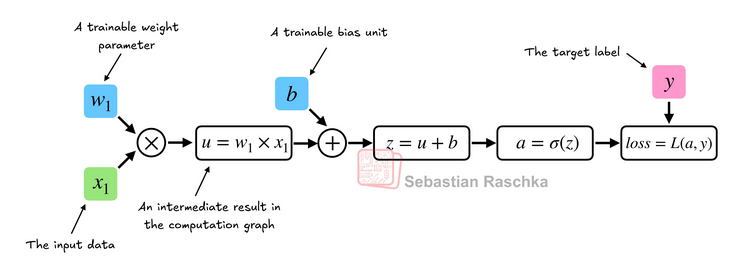

# **Como os pessos são calculados**


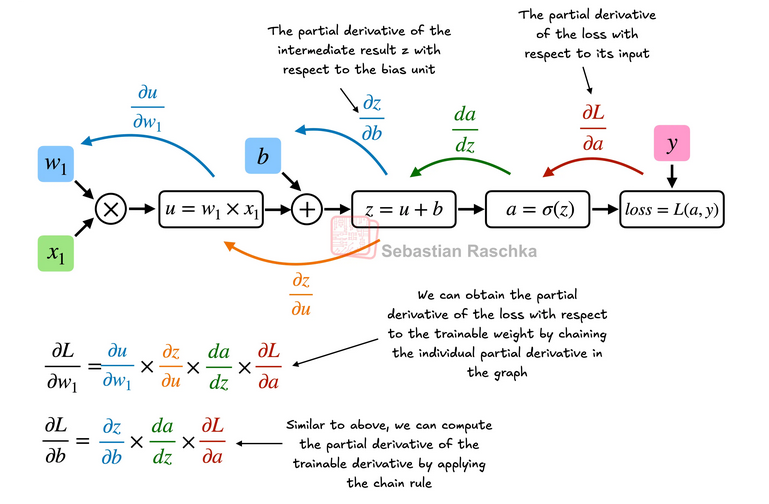

In [4]:
from torch.autograd import grad
y = torch.tensor([1.0])
x1 = torch.tensor([1.1])
w1 = torch.tensor([2.2], requires_grad=True)
b = torch.tensor([0.0], requires_grad=True)

z = x1 * w1 + b
a = torch.sigmoid(z)

loss = F.binary_cross_entropy(a, y)


grad_L_w1 = grad(loss, w1, retain_graph=True)
grad_L_b = grad(loss, b, retain_graph=True)

print(grad_L_w1)
print(grad_L_b)

#Porém fazer dessa forma serve somente para entendimento e para debugin, o pytorch oferece uma ferramenta de alto nível para
#calcular isso que é o .backward

loss.backward()

print(w1.grad)
print(b.grad)

#Tudo que importa nessa parte é isso, .backward, todo o resto serve somente para fins didáticos.


(tensor([-0.0898]),)
(tensor([-0.0817]),)
tensor([-0.0898])
tensor([-0.0817])


In [5]:
#Rede neural com várias camadas

class NeuralNetwork(torch.nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super().__init__()

        self.layers = torch.nn.Sequential( #Isso daqui ajuda a não termos que chamar camada por camada, basta chamar o self.layer, e elas são chaamdas nessa mesma ordem

            # 1st hidden layer
            torch.nn.Linear(num_inputs, 30),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(30, 20),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(20, num_outputs),
        )

    def forward(self, x): #Passa a entrada por toda a rede neural
        logits = self.layers(x)
        return logits


torch.manual_seed(123)


model = NeuralNetwork(50, 3)


print(model)

num_params = sum(
    p.numel() for p in model.parameters() if p.requires_grad
)
print("Total number of trainable model parameters:", num_params) #Quantidade de parametros treináveis, basta traduzir kk

print(model.layers[0].weight) #Pesos da primeira camada

print(model.layers[0].weight.shape)


#with torch.no_grad(): #Se quisermos usar um modelo, sem que ele seja treinado, fazemos isso daqui. Pois assim não usamos a memória dos grafos de backpropagation
#    out = model(X)
#print(out)

#with torch.no_grad(): #O torch usa, por default, a função sigmoid, para usarmos outra temos que explicitamente fazer isso
#    out = torch.softmax(model(X), dim=1)
#print(out)




NeuralNetwork(
  (layers): Sequential(
    (0): Linear(in_features=50, out_features=30, bias=True)
    (1): ReLU()
    (2): Linear(in_features=30, out_features=20, bias=True)
    (3): ReLU()
    (4): Linear(in_features=20, out_features=3, bias=True)
  )
)
Total number of trainable model parameters: 2213
Parameter containing:
tensor([[-0.0577,  0.0047, -0.0702,  ...,  0.0222,  0.1260,  0.0865],
        [ 0.0502,  0.0307,  0.0333,  ...,  0.0951,  0.1134, -0.0297],
        [ 0.1077, -0.1108,  0.0122,  ...,  0.0108, -0.1049, -0.1063],
        ...,
        [-0.0787,  0.1259,  0.0803,  ...,  0.1218,  0.1303, -0.1351],
        [ 0.1359,  0.0175, -0.0673,  ...,  0.0674,  0.0676,  0.1058],
        [ 0.0790,  0.1343, -0.0293,  ...,  0.0344, -0.0971, -0.0509]],
       requires_grad=True)
torch.Size([30, 50])


# **Essa é a imagem da rede neural criada**

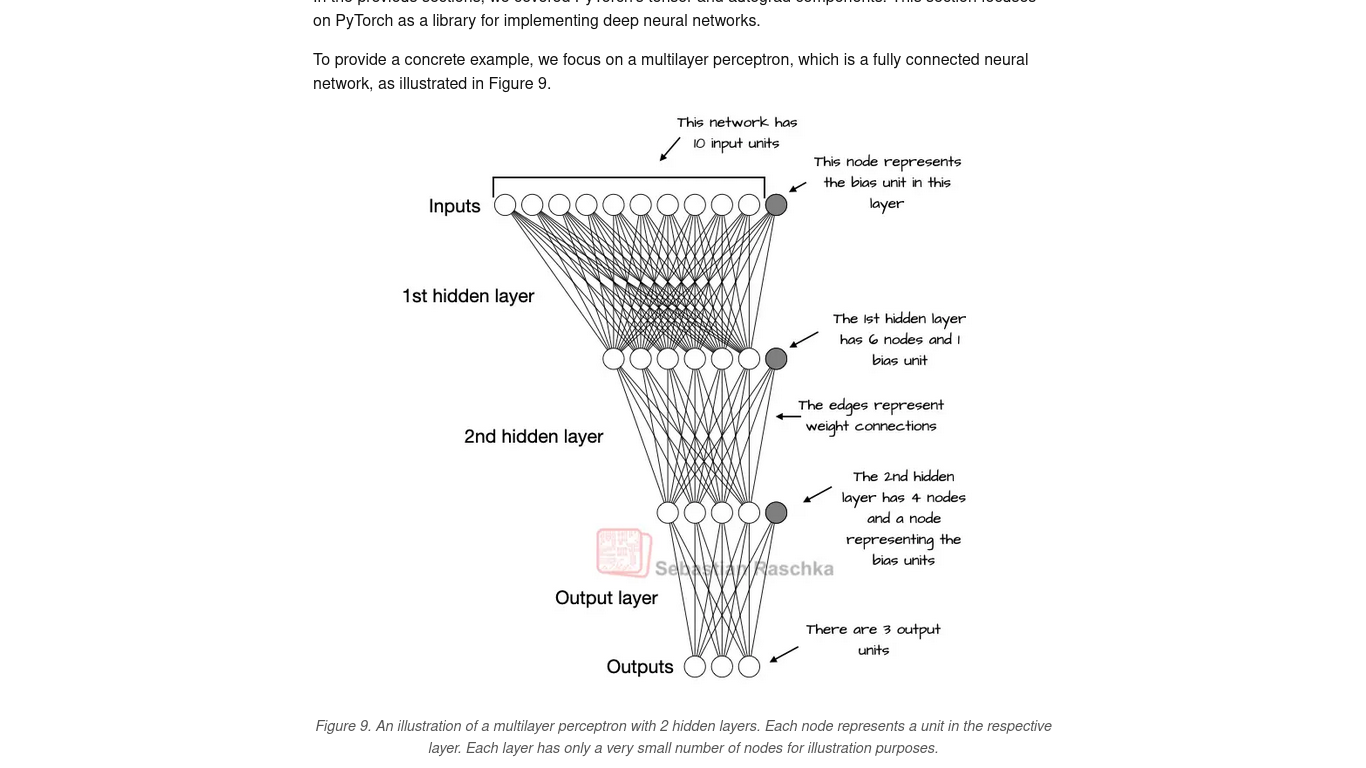

In [6]:
#Como configurar eficientemente os carregadores de dados

X_train = torch.tensor([
    [-1.2, 3.1],
    [-0.9, 2.9],
    [-0.5, 2.6],
    [2.3, -1.1],
    [2.7, -1.5]
])

y_train = torch.tensor([0, 0, 0, 1, 1])

X_test = torch.tensor([
    [-0.8, 2.8],
    [2.6, -1.6],
])

y_test = torch.tensor([0, 1])

from torch.utils.data import Dataset


class ToyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.labels = y

    def __getitem__(self, index):
        one_x = self.features[index]
        one_y = self.labels[index]
        return one_x, one_y

    def __len__(self):
        return self.labels.shape[0]

train_ds = ToyDataset(X_train, y_train)
test_ds = ToyDataset(X_test, y_test)

len(train_ds)



from torch.utils.data import DataLoader

torch.manual_seed(123)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=2,
    shuffle=True,
    num_workers=0
)

test_ds = ToyDataset(X_test, y_test)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=2,
    shuffle=False,
    num_workers=0 #Isso daqui é interessante que seja maior que zero para tratar de muitos dados. 4 é um bom valor
)

for idx, (x, y) in enumerate(train_loader):
    print(f"Batch {idx+1}:", x, y)


Batch 1: tensor([[ 2.3000, -1.1000],
        [-0.9000,  2.9000]]) tensor([1, 0])
Batch 2: tensor([[-1.2000,  3.1000],
        [-0.5000,  2.6000]]) tensor([0, 0])
Batch 3: tensor([[ 2.7000, -1.5000]]) tensor([1])


In [13]:
#Loop de treinamento
torch.manual_seed(123)
model = NeuralNetwork(num_inputs=2, num_outputs=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.5) #Hiperparâmetro

num_epochs = 3 #Hiperparâmetro

for epoch in range(num_epochs):

    model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels) # Loss function

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        ### LOGGING
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train/Val Loss: {loss:.2f}")

    model.eval()
    # Optional model evaluation

    #Se ele for zero ou perto de zero, quer dizer que convergiu

model.eval()

with torch.no_grad():
    outputs = model(X_train)

print(outputs)


torch.set_printoptions(sci_mode=False)
probas = torch.softmax(outputs, dim=1) #Não é necessário
print(probas)

predictions = torch.argmax(probas, dim=1) #Qual classe pertece, 1 ou dois
print(predictions)

predictions == y_train #Comparação 100% de acurácia

def compute_accuracy(model, dataloader):

    model = model.eval()
    correct = 0.0
    total_examples = 0

    for idx, (features, labels) in enumerate(dataloader):

        with torch.no_grad():
            logits = model(features)

        predictions = torch.argmax(logits, dim=1)
        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return (correct / total_examples).item()

compute_accuracy(model, train_loader)
compute_accuracy(model, test_loader)


Epoch: 001/003 | Batch 000/003 | Train/Val Loss: 0.75
Epoch: 001/003 | Batch 001/003 | Train/Val Loss: 0.65
Epoch: 001/003 | Batch 002/003 | Train/Val Loss: 0.42
Epoch: 002/003 | Batch 000/003 | Train/Val Loss: 0.05
Epoch: 002/003 | Batch 001/003 | Train/Val Loss: 0.13
Epoch: 002/003 | Batch 002/003 | Train/Val Loss: 0.00
Epoch: 003/003 | Batch 000/003 | Train/Val Loss: 0.01
Epoch: 003/003 | Batch 001/003 | Train/Val Loss: 0.00
Epoch: 003/003 | Batch 002/003 | Train/Val Loss: 0.02
tensor([[ 2.9320, -4.2563],
        [ 2.6045, -3.8389],
        [ 2.1484, -3.2514],
        [-2.1461,  2.1496],
        [-2.5004,  2.5210]])
tensor([[    0.9992,     0.0008],
        [    0.9984,     0.0016],
        [    0.9955,     0.0045],
        [    0.0134,     0.9866],
        [    0.0066,     0.9934]])
tensor([0, 0, 0, 1, 1])


1.0

In [15]:
#Salvando e carregando modelos

torch.save(model.state_dict(), "model.pth")

#Carregando

model = NeuralNetwork(2, 2) # needs to match the original model exactly
model.load_state_dict(torch.load("model.pth", weights_only=True))

#Tem mais conteudos de como treinar com somente um gpu ou com multiplas, porém não cabe aqui

<All keys matched successfully>